<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Parcial3/Tiempo_de_escape_de_un_fot%C3%B3n_del_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

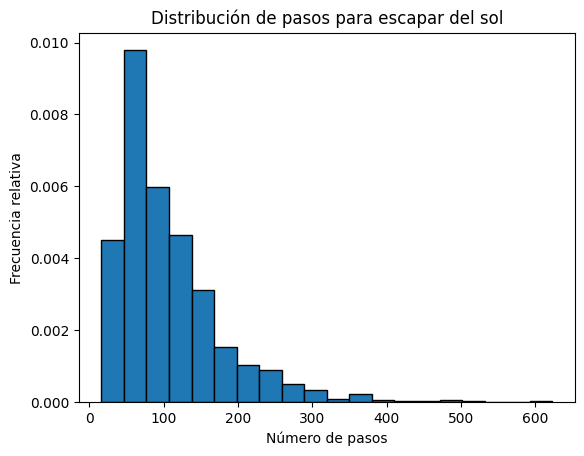

Valor esperado del número de pasos: 107.26245
Valor teórico de E(n): 100.0
Error relativo: 7.26%
Tiempo medio de escape: 6.80e-12 años


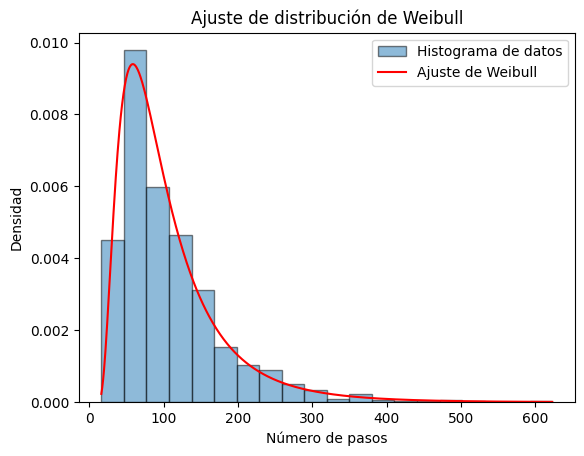

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

# Parámetros dados
ell = 0.1  # camino libre medio
Rs = 1  # radio del sol
N = 1000  # número de fotones
n_clases = 20  # número de clases para el histograma

# Generar la caminata aleatoria para N fotones
num_pasos = []

for _ in range(N):
    x, y, z = 0, 0, 0  # posición inicial en el centro del sol
    pasos = 0

    while np.sqrt(x**2 + y**2 + z**2) <= Rs:
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)

        x += ell * np.sin(theta) * np.cos(phi)
        y += ell * np.sin(theta) * np.sin(phi)
        z += ell * np.cos(theta)

        pasos += 1

    num_pasos.append(pasos)

# (b) Distribución de clases
plt.hist(num_pasos, bins=n_clases, density=True, edgecolor='black')
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución de pasos para escapar del sol')
plt.show()

# (e) Valor esperado de pasos
H, edges = np.histogram(num_pasos, bins=n_clases, density=True)
midpoints = 0.5 * (edges[:-1] + edges[1:])
bin_width = np.diff(edges)  # Ancho de cada clase

# Cálculo de E(n) considerando el ancho de los intervalos
E_n = np.sum(H * midpoints * bin_width)
print(f'Valor esperado del número de pasos: {E_n}')

# (f) Verificación de la relación teórica
E_teorico = (Rs / ell)**2
print(f'Valor teórico de E(n): {E_teorico}')
print(f'Error relativo: {abs(E_n - E_teorico) / E_teorico:.2%}')

# (g) Tiempo de escape
c = 300000  # velocidad de la luz en km/s
ell_cm = 0.6  # camino libre medio en cm
T_media = (E_n * ell_cm) / c  # tiempo en segundos
T_media_anos = T_media / (60 * 60 * 24 * 365)  # convertir a años
print(f'Tiempo medio de escape: {T_media_anos:.2e} años')

# (h) Ajuste de distribución de Weibull
params = exponweib.fit(num_pasos)
x_fit = np.linspace(min(num_pasos), max(num_pasos), 1000)
pdf_fit = exponweib.pdf(x_fit, *params)

# Dibujar el ajuste de distribución
plt.hist(num_pasos, bins=n_clases, density=True, edgecolor='black', alpha=0.5, label='Histograma de datos')
plt.plot(x_fit, pdf_fit, 'r-', label='Ajuste de Weibull')
plt.xlabel('Número de pasos')
plt.ylabel('Densidad')
plt.title('Ajuste de distribución de Weibull')
plt.legend()
plt.show()
